# Imports

In [247]:
from statsmodels.tsa import arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ARIMA, SARIMAX
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import aic
from datetime import datetime, timedelta

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [78]:
os.listdir()

['Untitled.ipynb',
 'ARIMA.ipynb',
 'airline_passengers.csv',
 'Time Series EDA.ipynb',
 '.ipynb_checkpoints']

# Data Loading

In [79]:
df = pd.read_csv('airline_passengers.csv')

In [80]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


# Null values

In [81]:
df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [82]:
df[df['Thousands of Passengers'].isna()]

,Month,Thousands of Passengers
144,International airline passengers: monthly tota...,NaN


In [83]:
df.drop(144, axis = 0, inplace = True)

In [84]:
df['Month'] = pd.to_datetime(df.Month)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [86]:
df.set_index('Month', inplace = True)

In [87]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

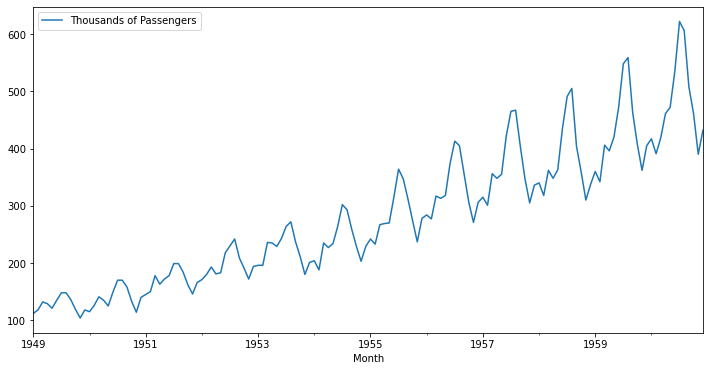

In [88]:
df.plot(figsize=(12,6))

In [89]:
sd = seasonal_decompose(df, model = 'additive')

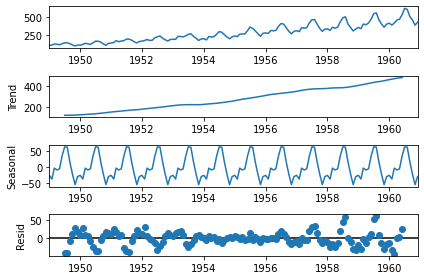

In [90]:
sd.plot()
plt.show()

In [ ]:
df

In [112]:
def adf_result(series):
    adf = adfuller(series)
    print('P-value: ', adf[1])
    if adf[1]<0.05:
        print('Series is stationary')
    else:
        print('Series is NOT stationary')

In [92]:
df['1st_diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [113]:
adf_result(df['1st_diff'].dropna())

P-value:  0.05421329028382711
Series is NOT stationary


<AxesSubplot:xlabel='Month'>

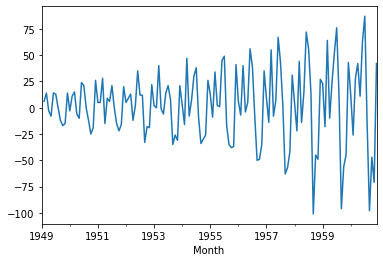

In [94]:
df['1st_diff'].plot()

In [96]:
df['2nd_diff'] = df['1st_diff'] - df['1st_diff'].shift(1)

In [111]:
adf_result(df['2nd_diff'].dropna())

P-value:  2.7328918500142026e-29
Series is stationary


<AxesSubplot:xlabel='Month'>

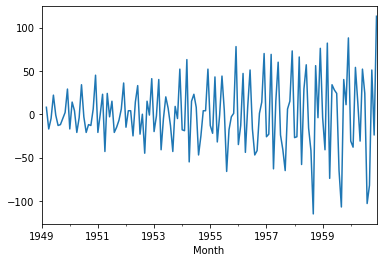

In [98]:
df['2nd_diff'].plot()

In [102]:
df['12th_diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [114]:
adf_result(df['12th_diff'].dropna())

P-value:  0.011551493085514982
Series is stationary


<AxesSubplot:xlabel='Month'>

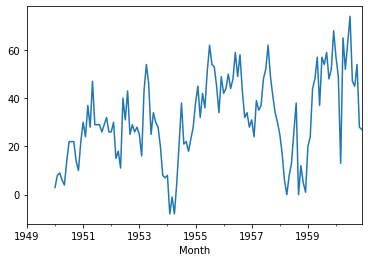

In [115]:
df['12th_diff'].plot()

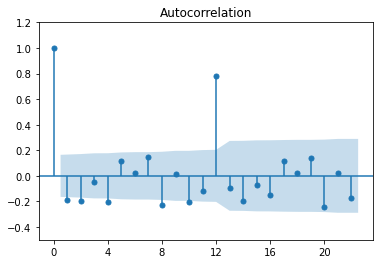

In [138]:
plot_acf(df['2nd_diff'].dropna())
plt.ylim(-0.5,1.2)
plt.xticks(ticks=np.arange(0,21,4))
plt.show()

/home/gabriel/anaconda3/envs/co2-env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


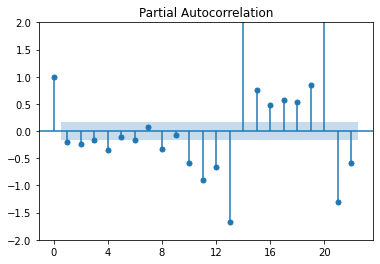

In [169]:
plot_pacf(df['2nd_diff'].dropna())
plt.ylim(-2,2)
plt.xticks(ticks=np.arange(0,21,4))
plt.show()

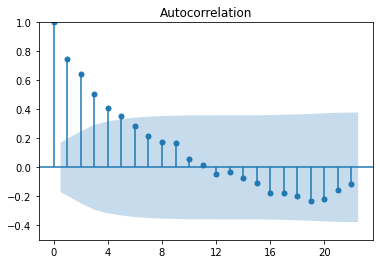

In [206]:
plot_acf(df['12th_diff'].dropna())
plt.ylim(-0.5,1)
plt.xticks(ticks=np.arange(0,21,4))
plt.show()

/home/gabriel/anaconda3/envs/co2-env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


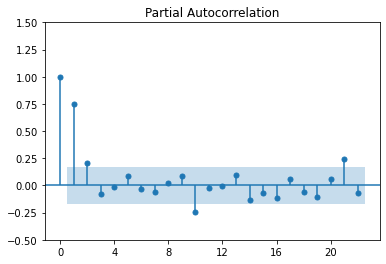

In [142]:
plot_pacf(df['12th_diff'].dropna())
plt.ylim(-0.5,1.5)
plt.xticks(ticks=np.arange(0,21,4))
plt.show()

In [145]:
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [146]:
train_dataset_end

datetime.datetime(1955, 12, 1, 0, 0)

In [177]:
train_set = df[:train_dataset_end]
test_set = df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [190]:
model_arima = ARIMA(train_set['Thousands of Passengers'], order=(11,2,10))

In [191]:
fit_arima = model_arima.fit()

/home/gabriel/anaconda3/envs/co2-env/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/gabriel/anaconda3/envs/co2-env/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
fit_arima.summary()

In [193]:
pred_start_date=test_set.index[0]
pred_end_date=test_set.index[-1]

In [194]:
pred= fit_arima.predict(start=pred_start_date,end=pred_end_date)


In [195]:
test_set['Predicted_ARIMA']=pred

/tmp/ipykernel_37841/2209155507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

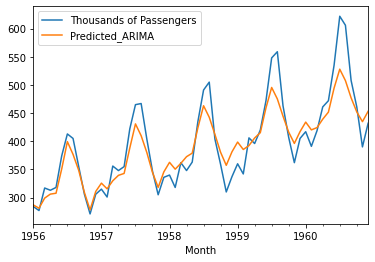

In [196]:
test_set[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [242]:
model_SARIMA=SARIMAX(train_set['Thousands of Passengers'], 
                     order=(11,2,10), 
                     seasonal_order=(2,0,5,12))

/home/gabriel/anaconda3/envs/co2-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

In [ ]:
model_SARIMA_fit.summary() 

In [245]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))

In [ ]:
test_set['Predicted_SARIMA']=pred_Sarima

<AxesSubplot:xlabel='Month'>

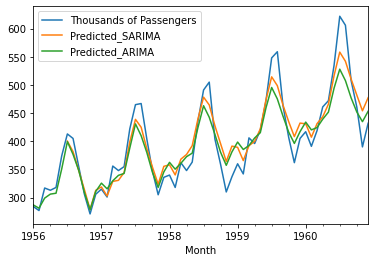

In [266]:
test_set[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [255]:
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred)/y_true)*100)

In [263]:
print("MAPE ARIMA: ", mape(test_set['Thousands of Passengers'], test_set['Predicted_ARIMA']))
print("MAPE SARIMA: ", mape(test_set['Thousands of Passengers'], test_set['Predicted_SARIMA']))

MAPE ARIMA:  5.9005013780594275
MAPE SARIMA:  5.439500894852047
